In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline    # use for other than jupyter to get output in same line
import seaborn as sns

In [85]:
df = pd.read_csv("titanic.csv")

In [ ]:
df.head(3)

In [ ]:
df.tail(3)

In [ ]:
df.shape

In [ ]:
df.dtype

In [ ]:
df.columns 

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.describe(include = all) # for all columns

# data filtering

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

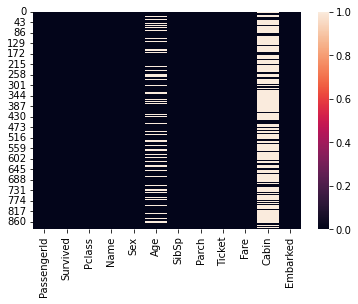

In [9]:
sns.heatmap(df.isnull())

In [12]:
df.drop(["PassengerId","Sex"],axis = 1)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C


In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df["Age"].fillna(df["Age"].mean(),inplace = True)

In [38]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
df["Embarked"].fillna(df["Embarked"].mode(),inplace = True)

In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
df["Embarked"].mode()

0    S
dtype: object

In [44]:
df["Embarked"].fillna("S",inplace = True)

In [45]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# category data encoding

In [59]:
 df["Sex"] = df["Sex"].map({"male":1,"female":0})

In [55]:
 df["gender"] = df["Sex"].map({"male":1,"female":0})

In [62]:
df.drop(["gender"],axis=1,inplace = True)

In [69]:
x =df["Sex"].map({"male":1,"female":0})

In [70]:
df.insert(4,"hitesh",x)    # while insert we have to give index,name  and value to insert 

In [86]:
df_new = pd.get_dummies(df,columns = ["Embarked"],drop_first=True)  # first columns remove to avoid dummy variable trap

In [88]:
df_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1


# univariate analysis 

In [90]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

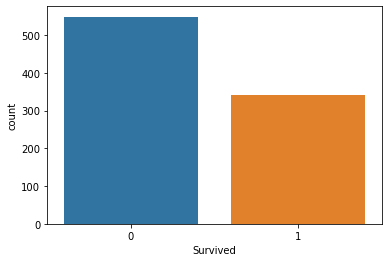

In [91]:
sns.countplot(df["Survived"])

In [92]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

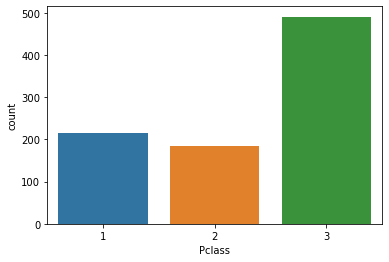

In [93]:
sns.countplot(df["Pclass"])

In [94]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

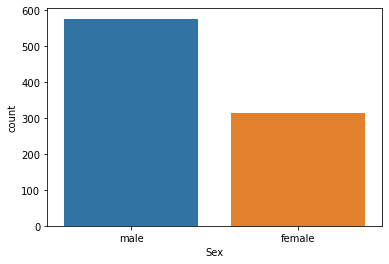

In [95]:
sns.countplot(df["Sex"])

(array([577., 314.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

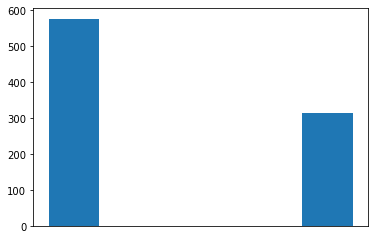

In [104]:
plt.hist(df["Sex"],bins =2,rwidth = .2)     # is use to count the frequency of elements of columns

Text(0.5, 1.0, 'age vs frequency graph  ')

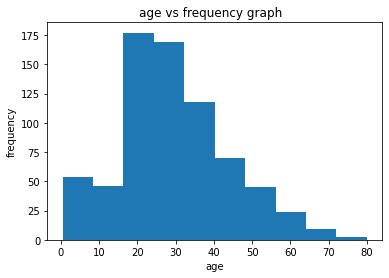

In [108]:
plt.hist(df["Age"])
plt.xlabel("age")
plt.ylabel("frequency")
plt.title("age vs frequency graph  ")

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Age'>

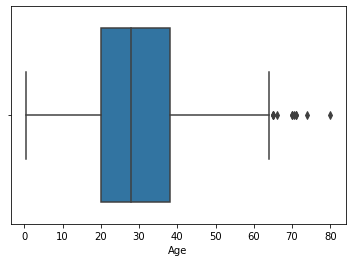

In [115]:
sns.boxplot(df["Age"],orient = "v") #Vertical orientation ignored with only `x` specified.

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Sex'>

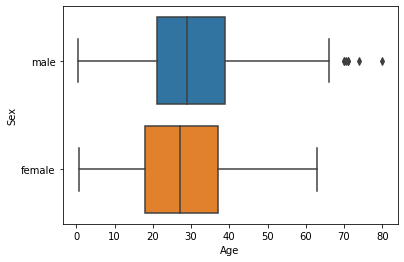

In [118]:
sns.boxplot(df["Age"],df["Sex"])  #male age group b/w 20 to 40 and female age group b/w 17 to 37 

In [119]:
sns.boxplot(df["Age"],df["Sex"],orient = "v")   #Vertical orientation requires numeric `y` variable.


C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Vertical orientation requires numeric `y` variable.

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Fare'>

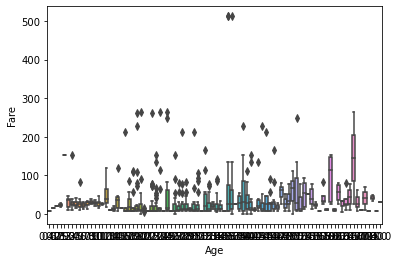

In [120]:
sns.boxplot(df["Age"],df["Fare"],orient = "v")

# bivariate analysis

In [124]:
df.groupby(df["Sex"])["Survived"].mean().sort_values(ascending = False)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

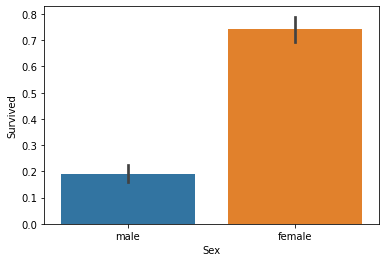

In [127]:
sns.barplot(df["Sex"],df["Survived"])   # is use to groupby x axis columns and mean of y axis columns
#comparing category of data 

C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

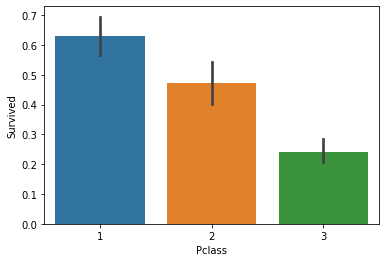

In [128]:
sns.barplot(df["Pclass"],df["Survived"])

In [129]:
df.groupby(df["Pclass"])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [131]:
df["family fare per person"] = df["Fare"]/(df["SibSp"] + df["Parch"] +1)

In [132]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family fare per person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,13.00000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,30.00000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,5.86250
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,30.00000
